# IBM HR Analytics Employee Attrition & Performance Analysis

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold, cross_validate                 # cross validation
from sklearn.metrics import make_scorer, f1_score, recall_score
from sklearn.model_selection import RandomizedSearchCV                              # Hyperparameter tuning
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle

import warnings
warnings.filterwarnings('ignore')



In [48]:
data= pd.read_csv(r'F:\Vaishnavi\practiced\vs code\Unified Mentor\IBM HR Analytic Employee Attrition\HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [49]:
data.shape

(1470, 35)

In [50]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
data.duplicated().sum()

np.int64(0)

In [52]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# EDA

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [54]:
data1 = data.copy()

data1.drop(columns=['EmployeeNumber','EmployeeCount','Over18','StandardHours'],  axis=1, inplace=True)
data1


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [55]:
data1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

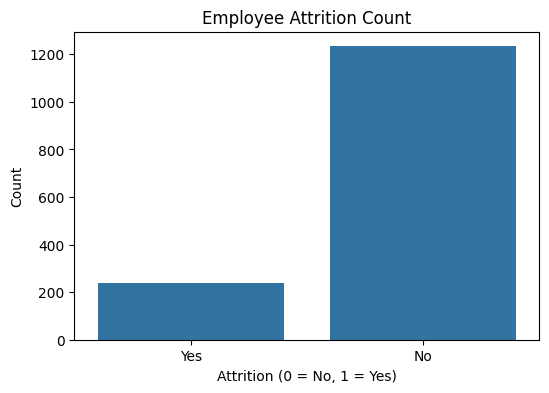

In [56]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=data1)
plt.title('Employee Attrition Count')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Huge difference in Yes and No count for attrition shows imbalanced data.

In [57]:
# defining function to plot for numeric features

def numeric_features_plot(data, feature, target):
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    
    # Boxplot
    sns.boxplot(x=target, y=feature, data=data, ax=axes[0])
    axes[0].set_title(f'{feature} vs {target} (Boxplot)')
    
    # Histogram
    sns.histplot(data[feature], bins=20, kde=False, color='skyblue', ax=axes[1])
    axes[1].set_title(f'Distribution of {feature} (Histogram)')
    
    plt.tight_layout()
    plt.show()

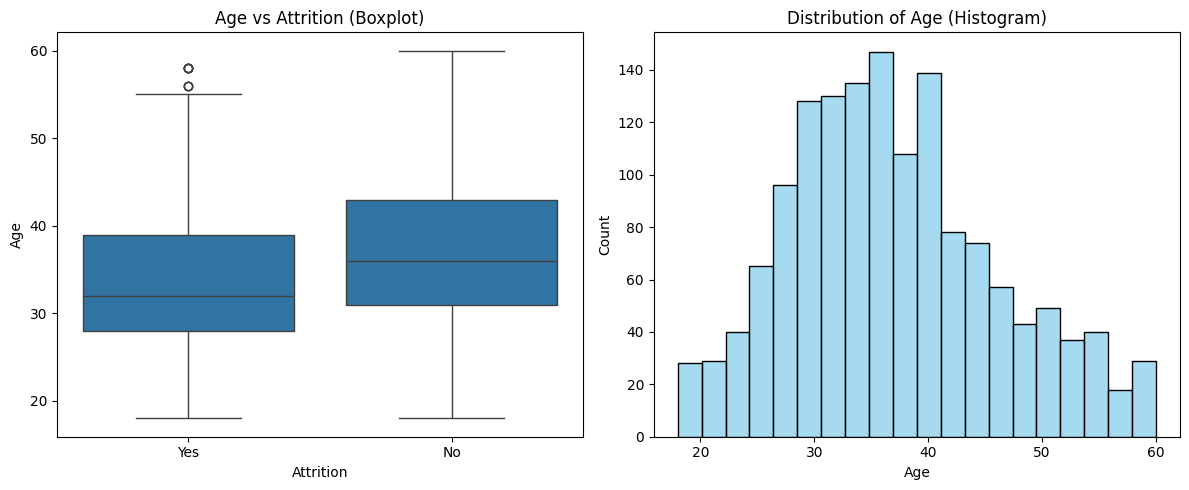

In [58]:
numeric_features_plot(data=data1, feature='Age', target= 'Attrition')

-Employee ho are erly in their career are more likey to leave job. hile the eperiance peron i

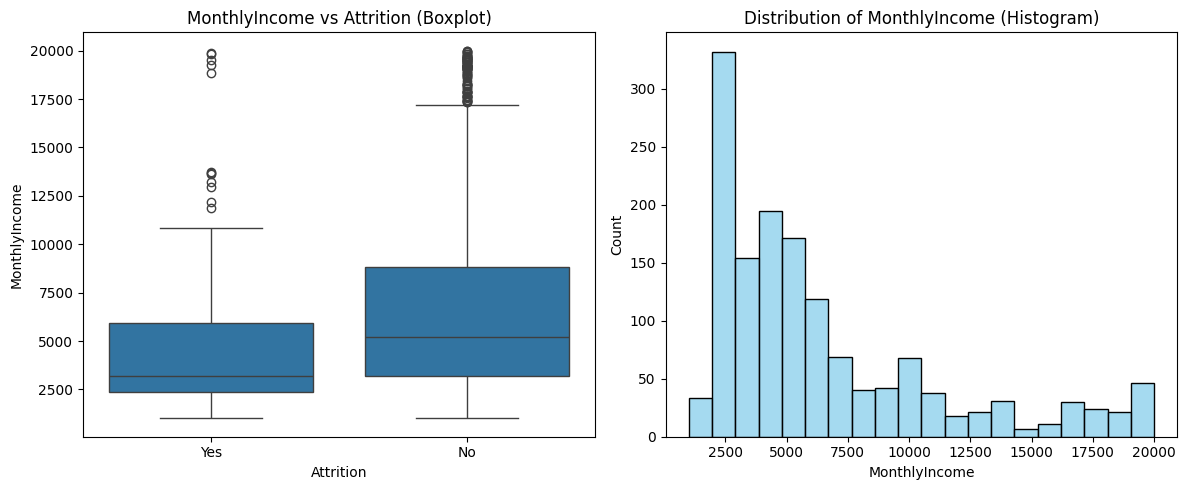

In [59]:
numeric_features_plot(data=data1, feature='MonthlyIncome', target= 'Attrition')

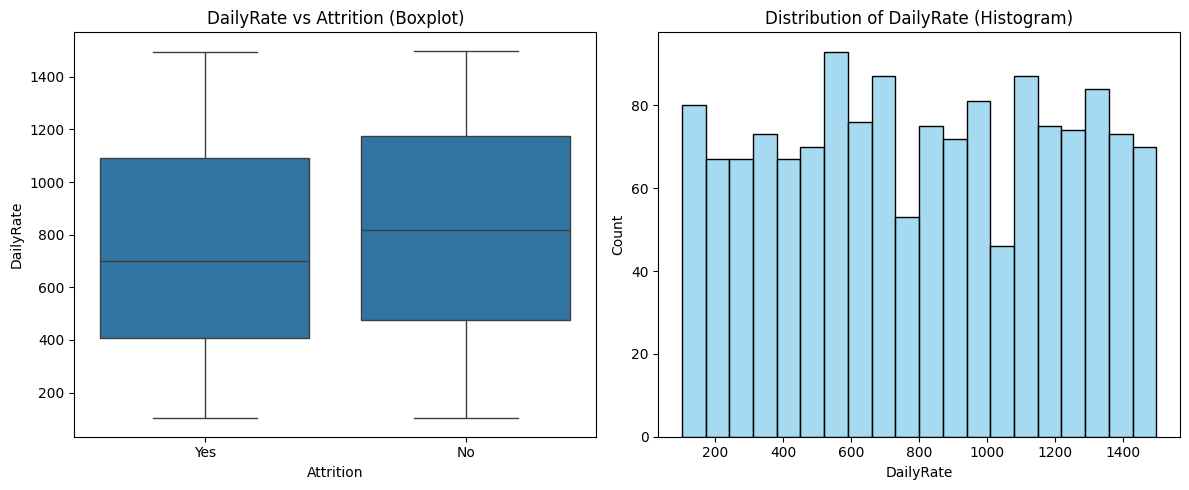

In [60]:
numeric_features_plot(data=data1, feature='DailyRate', target= 'Attrition')

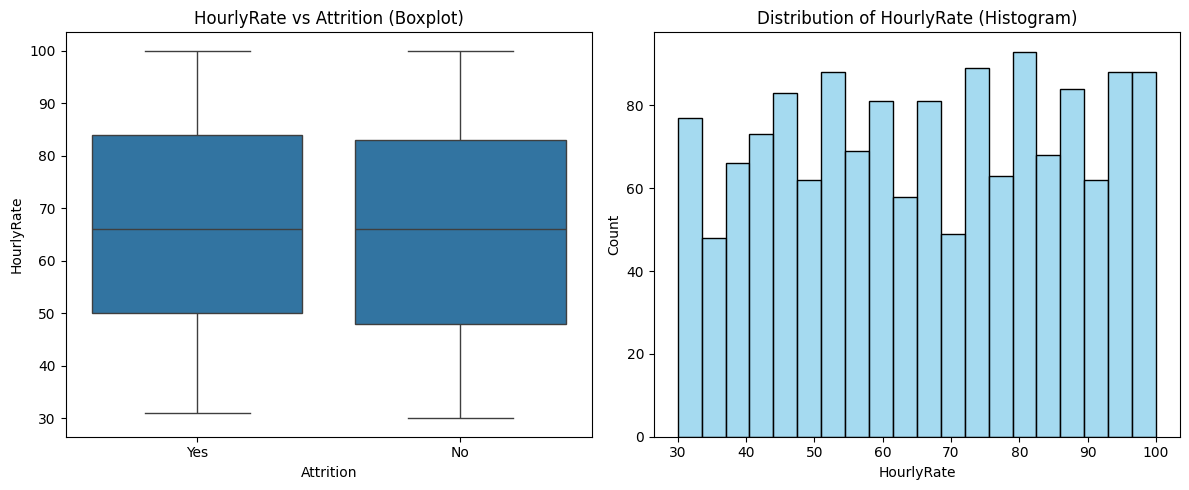

In [61]:
numeric_features_plot(data=data1, feature='HourlyRate', target= 'Attrition')

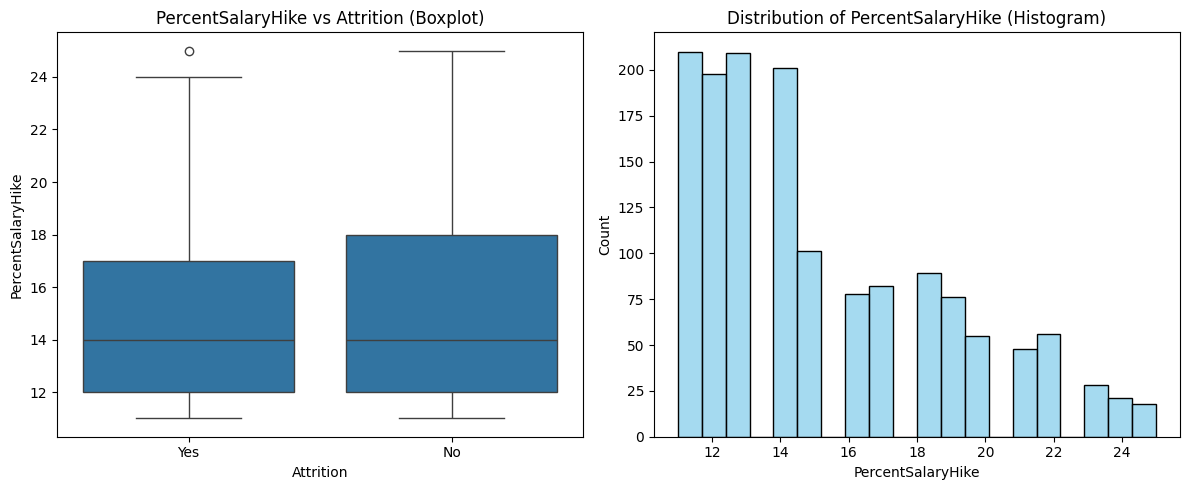

In [62]:
numeric_features_plot(data=data1, feature='PercentSalaryHike', target= 'Attrition')

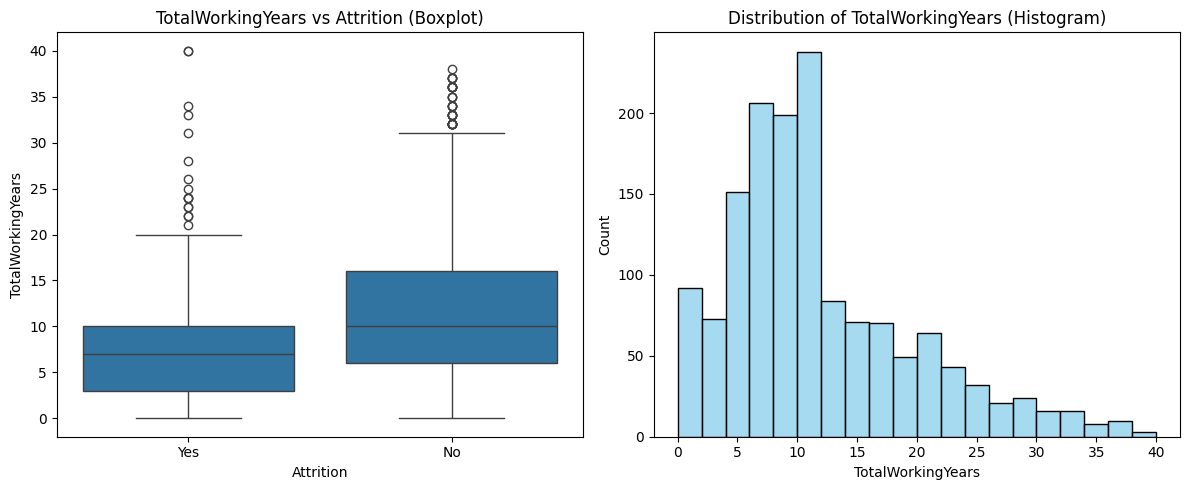

In [63]:
numeric_features_plot(data=data1, feature='TotalWorkingYears', target= 'Attrition')

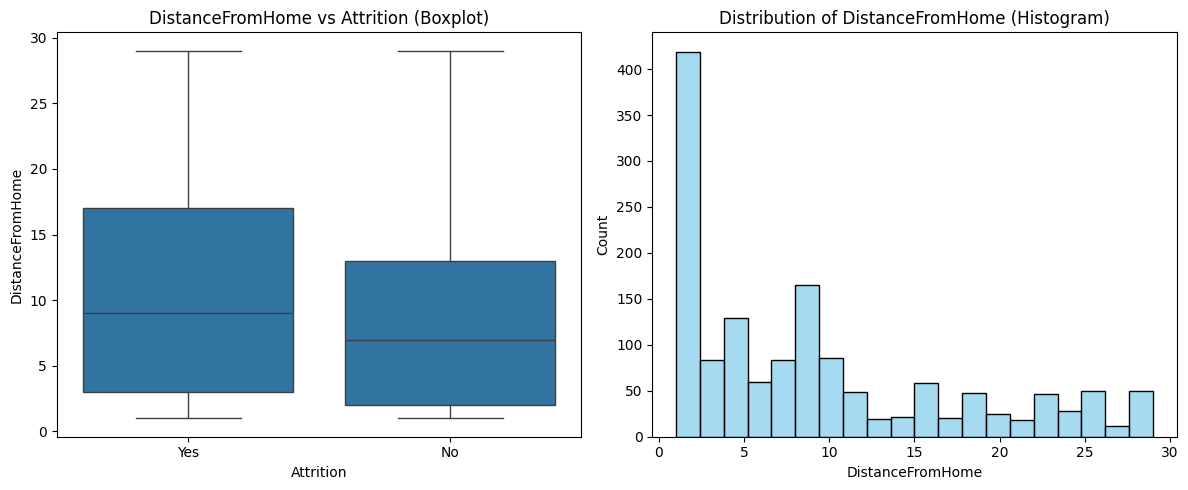

In [64]:
numeric_features_plot(data=data1, feature='DistanceFromHome', target= 'Attrition')

In [65]:
data1['Attrition_num'] = data1['Attrition'].map({'No': 0, 'Yes': 1})

def categorical_features_plot(data, feature, target='Attrition_num', invert_axis = False ):
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    
    # Boxplot
    if invert_axis == True:
        sns.countplot(y=feature, hue='Attrition', data=data, ax=axes[0])
        axes[0].set_title(f'{feature} vs {target} (Boxplot)')
    else:
        sns.countplot(x=feature, hue='Attrition', data=data, ax=axes[0])
        axes[0].set_title(f'{feature} vs {target} (Boxplot)')
    # Histogram
    if invert_axis == True:
        sns.barplot(y=feature, x=target, data=data, ax=axes[1], ci=None)
        axes[1].set_title(f'Distribution of {feature} (Histogram)')
    else:
        sns.barplot(x=feature, y=target, data=data, ax=axes[1], ci=None)
        axes[1].set_title(f'Distribution of {feature} (Histogram)')
    
    
    plt.tight_layout()
    plt.show()

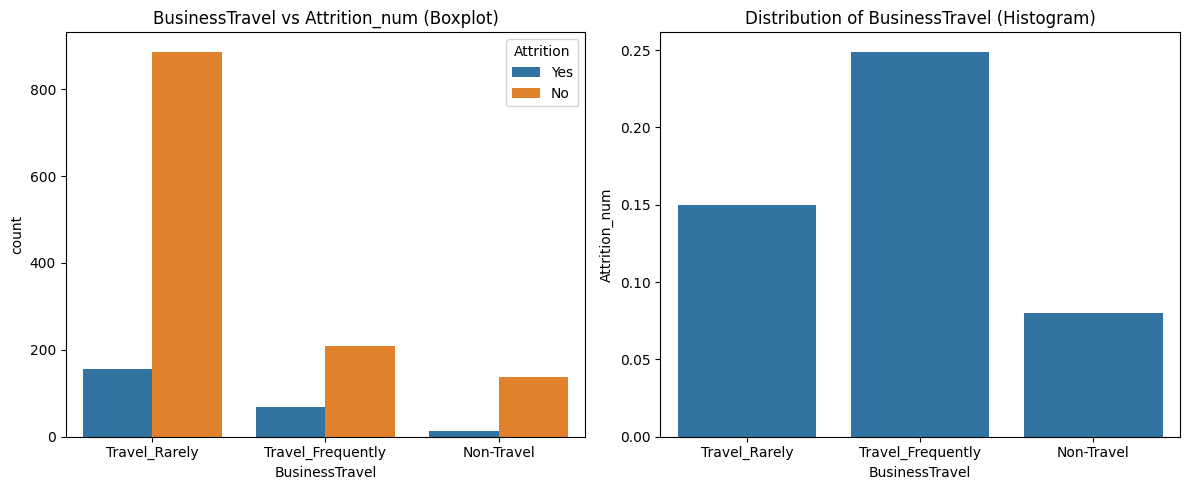

In [66]:
categorical_features_plot(data=data1, feature= 'BusinessTravel', target='Attrition_num')

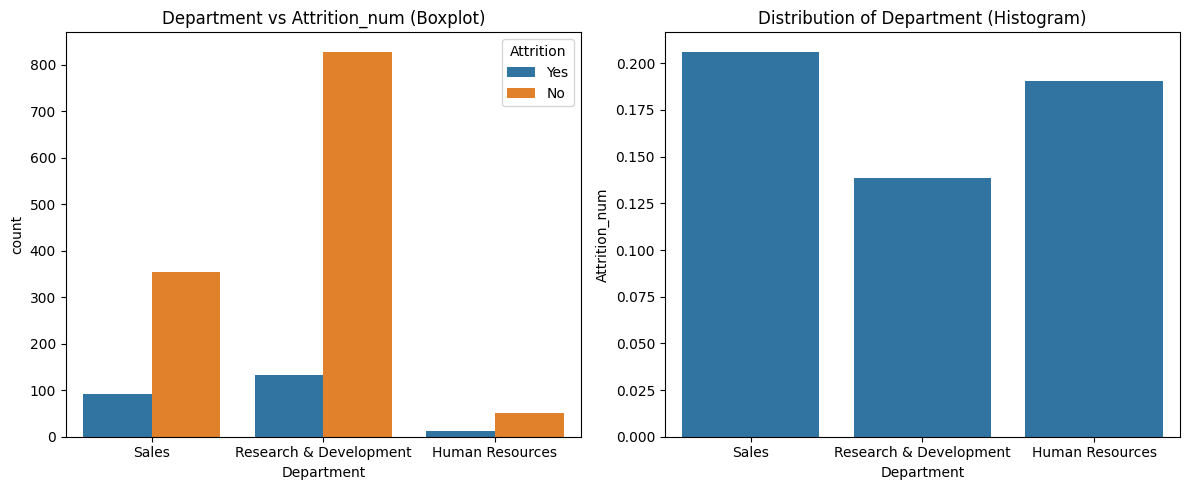

In [67]:
categorical_features_plot(data=data1, feature= 'Department', target='Attrition_num')

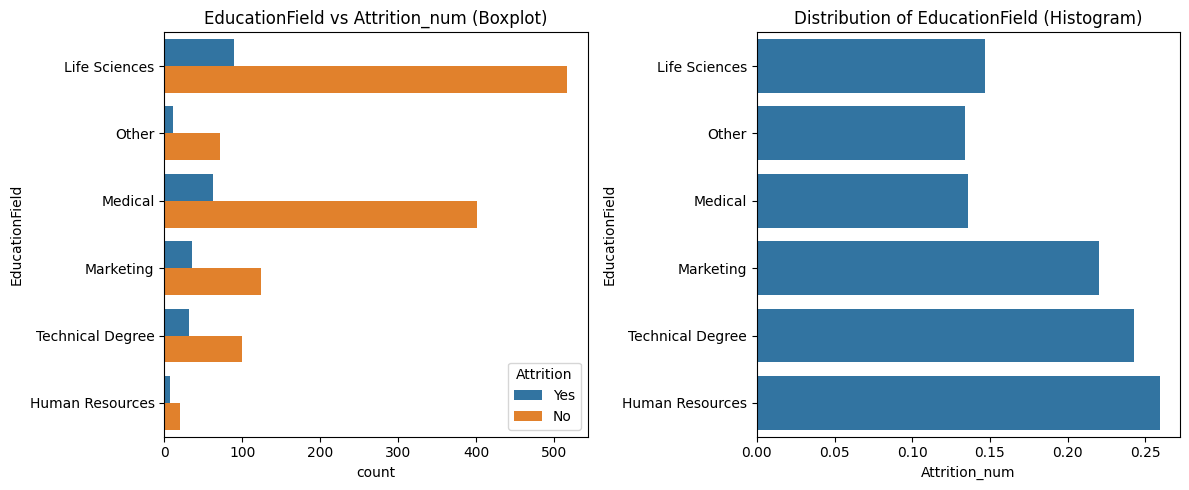

In [68]:
categorical_features_plot(data=data1, feature= 'EducationField', target='Attrition_num',invert_axis= True)

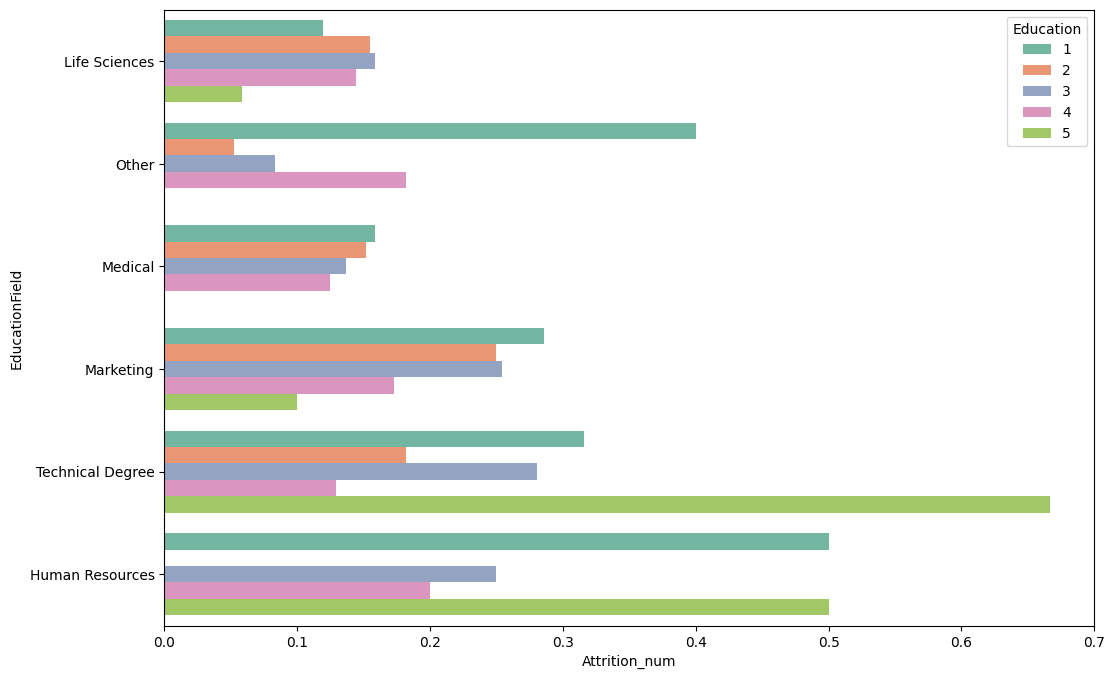

In [69]:
plt.figure(figsize=(12,8))
sns.barplot(data=data1, x= 'Attrition_num', y='EducationField', hue='Education',palette='Set2',ci=None)
plt.show()

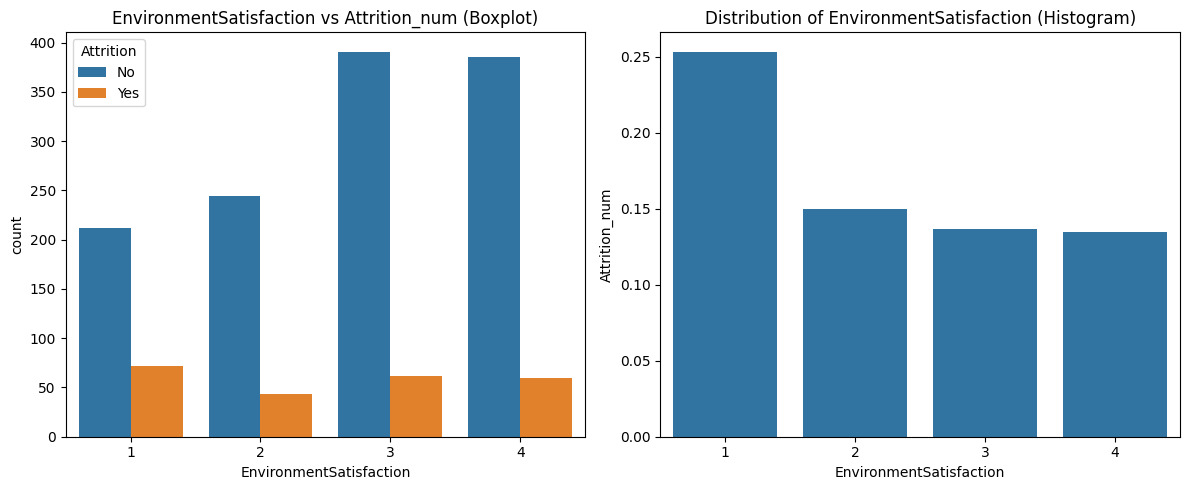

In [70]:
categorical_features_plot(data=data1, feature= 'EnvironmentSatisfaction', target='Attrition_num')

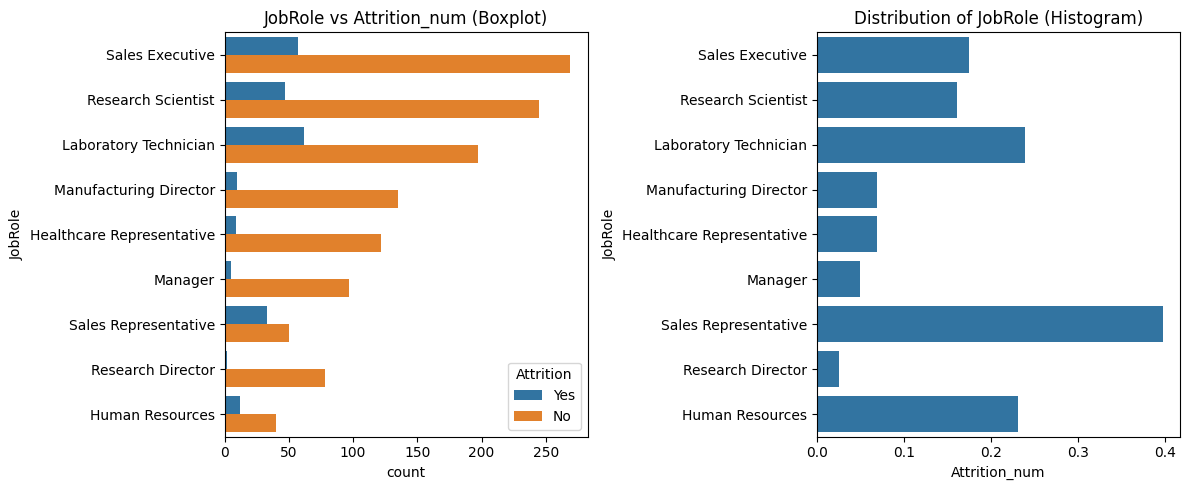

In [71]:
categorical_features_plot(data=data1, feature= 'JobRole', target='Attrition_num',invert_axis= True)

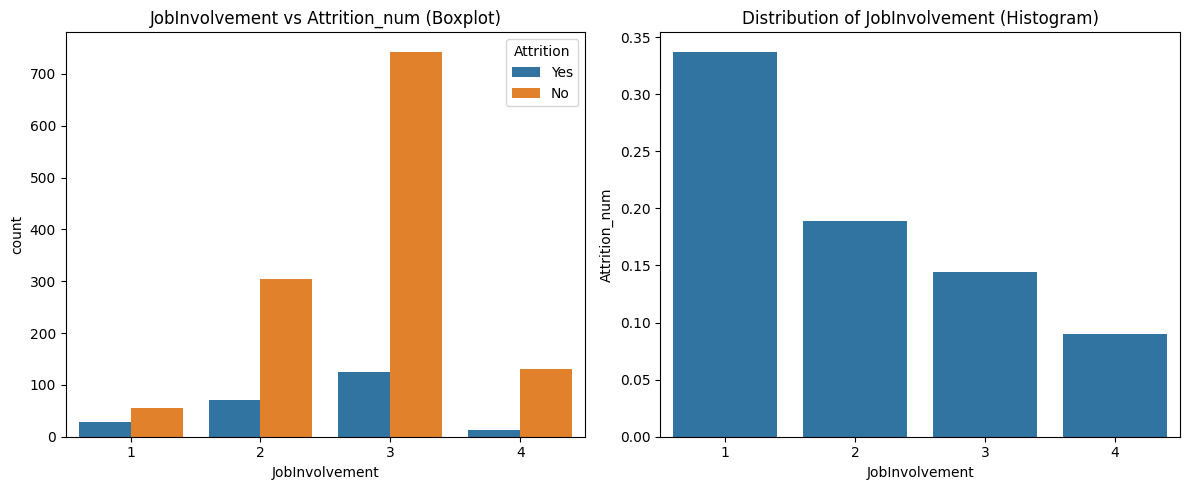

In [72]:
categorical_features_plot(data=data1, feature= 'JobInvolvement', target='Attrition_num')

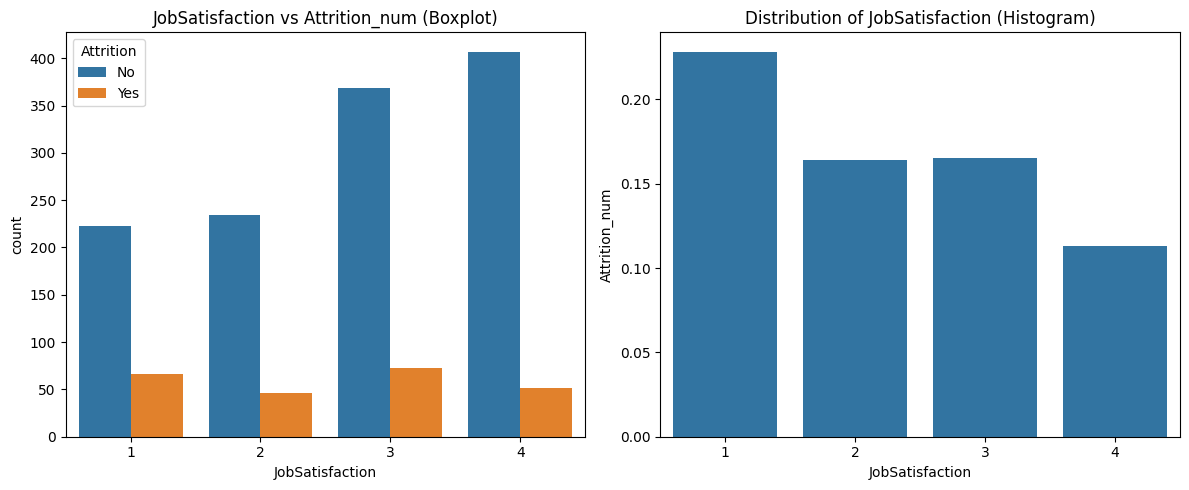

In [73]:
categorical_features_plot(data=data1, feature= 'JobSatisfaction', target='Attrition_num')

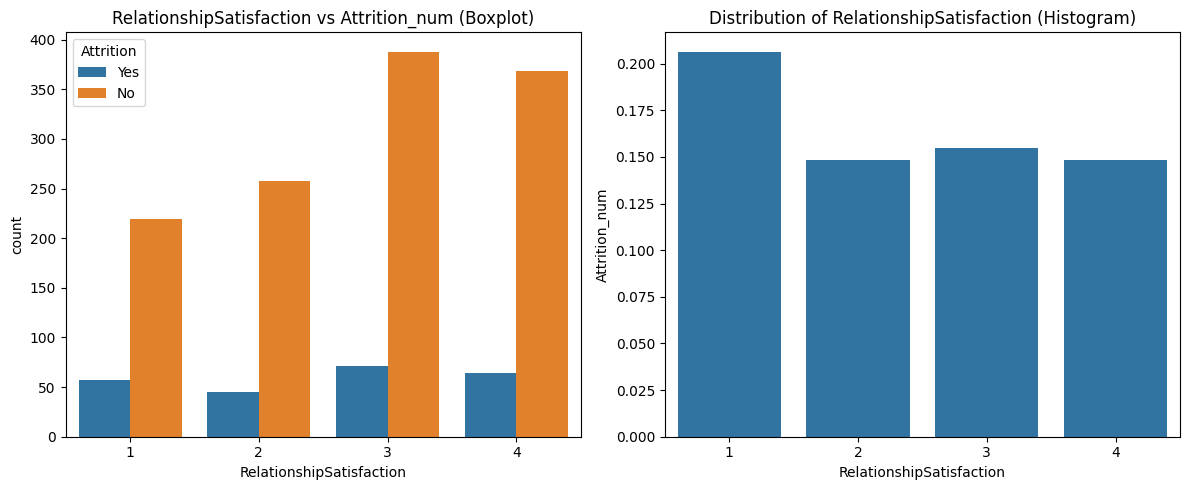

In [74]:
categorical_features_plot(data=data1, feature= 'RelationshipSatisfaction', target='Attrition_num')

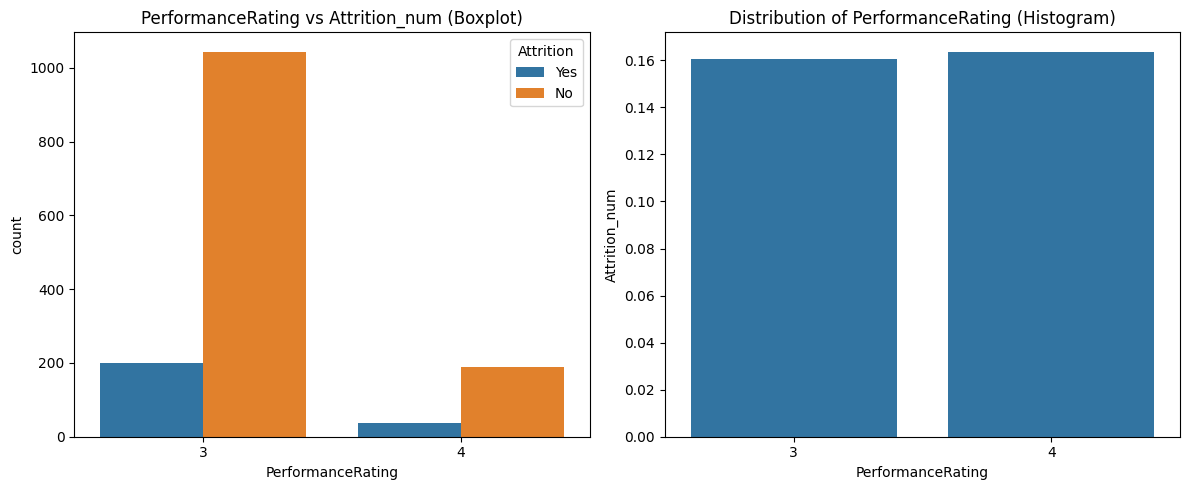

In [75]:
categorical_features_plot(data=data1, feature= 'PerformanceRating', target='Attrition_num')

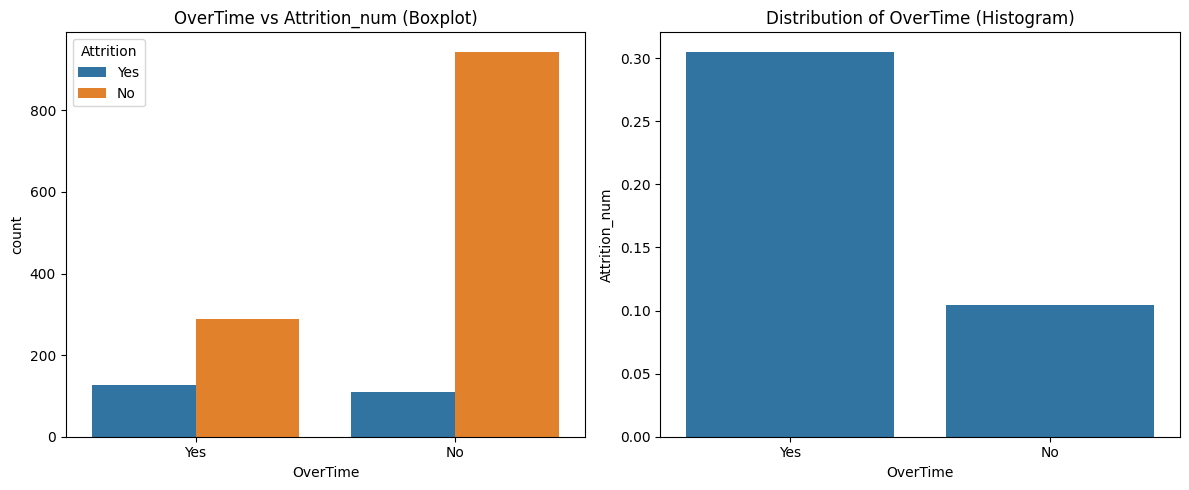

In [76]:
categorical_features_plot(data=data1, feature= 'OverTime', target='Attrition_num')

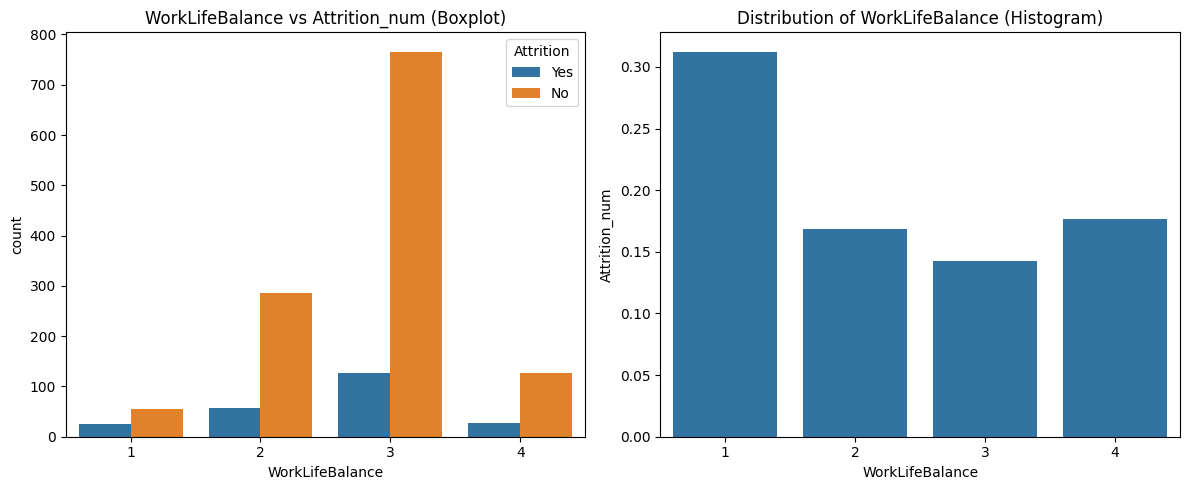

In [77]:
categorical_features_plot(data=data1, feature= 'WorkLifeBalance', target='Attrition_num')

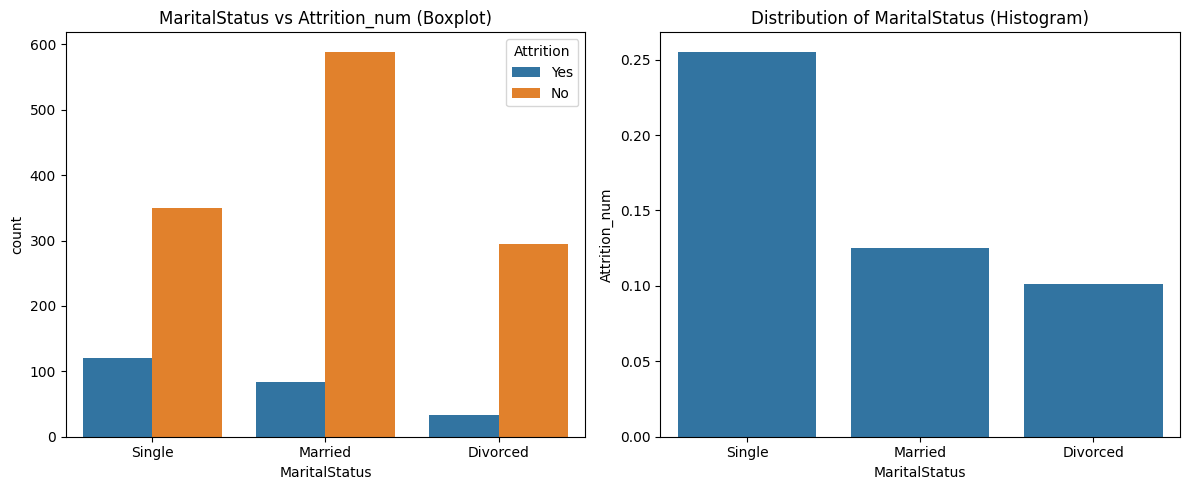

In [78]:
categorical_features_plot(data=data1, feature= 'MaritalStatus', target='Attrition_num')

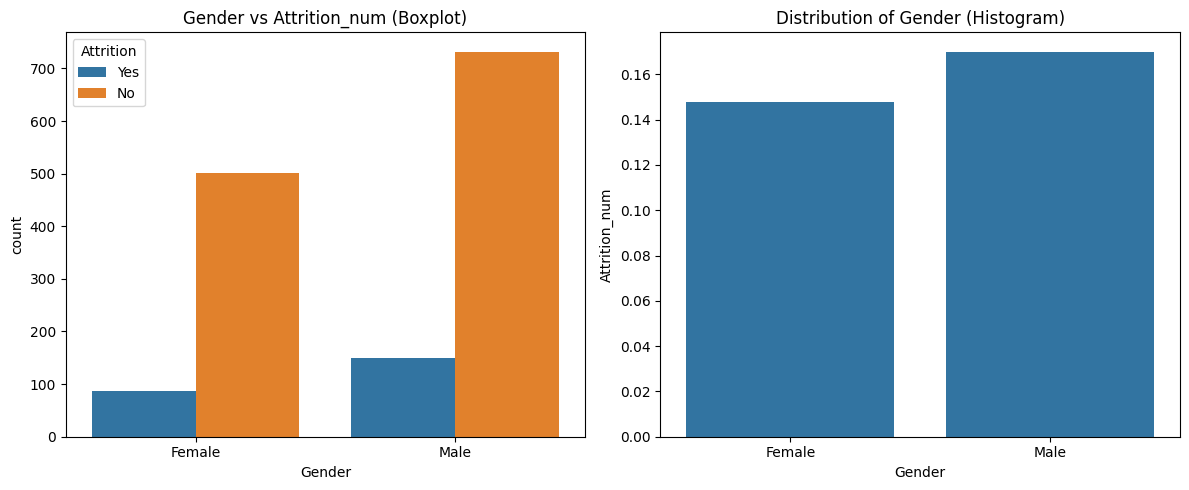

In [79]:
categorical_features_plot(data=data1, feature= 'Gender', target='Attrition_num')

In [80]:
# drop unneccessary columns

data1.drop(['Gender','HourlyRate','Attrition_num'], axis=1,inplace=True)
 

# Model Building

In [81]:
# seperating the target variable from other features

X = data1.drop('Attrition', axis=1)
y = data1['Attrition']

In [82]:
# one-hot encoding

categorical_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True).astype(int)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (1176, 42) (1176,)
Test set: (294, 42) (294,)


In [84]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
}

In [85]:
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # performance metrix
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # ideal value for classification performance metric =1
    print(f"{name} Results --> Accuracy: {acc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


Logistic Regression Results --> Accuracy: 0.8571, F1: 0.8006, Precision: 0.7511, Recall: 0.8571
Decision Tree Results --> Accuracy: 0.7721, F1: 0.7818, Precision: 0.7927, Recall: 0.7721
Random Forest Results --> Accuracy: 0.8776, F1: 0.8341, Precision: 0.8684, Recall: 0.8776
Gradient Boosting Results --> Accuracy: 0.8878, F1: 0.8667, Precision: 0.8712, Recall: 0.8878


Even if the data is imbalanced, model recall for every model is good which means minority class learning for all models is quite well. So, I skip SMOTE and will go for cross validation to confirm if specific model really is good for this data.

In [86]:
# Stratefied K-fold cross validation(classification + imbalanced data)

# from sklearn.model_selection import StratifiedKFold, cross_validate
# from sklearn.metrics import make_scorer, f1_score, recall_score

models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

scoring = {
    'accuracy': 'accuracy',
    'f1_weighted': 'f1_weighted',
    'recall_weighted': 'recall_weighted',
    'precision_weighted': 'precision_weighted'
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scorers
f1 = make_scorer(f1_score, average='weighted')
recall = make_scorer(recall_score, average='weighted')

print("\nCross Validation Results:\n")

for name, model in models.items():
    
    results = cross_validate(model, X, y, cv=skf, scoring=scoring, return_estimator=False)

    print(f"{name} Results (Cross-Validation):")
    print(f"  Accuracy : {results['test_accuracy'].mean():.4f} (+/- {results['test_accuracy'].std():.4f})")
    print(f"  F1 Score : {results['test_f1_weighted'].mean():.4f} (+/- {results['test_f1_weighted'].std():.4f})")
    print(f"  Recall   : {results['test_recall_weighted'].mean():.4f} (+/- {results['test_recall_weighted'].std():.4f})")
    print(f"  Precision: {results['test_precision_weighted'].mean():.4f} (+/- {results['test_precision_weighted'].std():.4f})")
    print("-" * 40)



Cross Validation Results:

Random Forest Results (Cross-Validation):
  Accuracy : 0.8558 (+/- 0.0076)
  F1 Score : 0.8139 (+/- 0.0080)
  Recall   : 0.8558 (+/- 0.0076)
  Precision: 0.8507 (+/- 0.0288)
----------------------------------------
Gradient Boosting Results (Cross-Validation):
  Accuracy : 0.8646 (+/- 0.0124)
  F1 Score : 0.8405 (+/- 0.0169)
  Recall   : 0.8646 (+/- 0.0124)
  Precision: 0.8485 (+/- 0.0191)
----------------------------------------


# Final Model

In [87]:
#from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingClassifier(random_state=42)

# Hyperparameter 
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

rs = RandomizedSearchCV(
    gb,
    param_distributions=param_dist,
    n_iter=10,                               # number of random combinations to try
    scoring='f1_weighted',
    cv=5,                                    # uses Stratified 5-Fold CV because y is categorical 
    n_jobs=-1,
    random_state=42
)


rs.fit(X_train, y_train)

print("Best Parameters:", rs.best_params_)
print("Best CV Score:", rs.best_score_)


Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.1}
Best CV Score: 0.8453505541789255


In [88]:
#from sklearn.metrics import classification_report

final_model = rs.best_estimator_
y_pred = final_model.predict(X_test)

print("Classification Report of final_model\n")
print(classification_report(y_test, y_pred))

Classification Report of final_model

              precision    recall  f1-score   support

          No       0.89      0.96      0.92       255
         Yes       0.48      0.26      0.33        39

    accuracy                           0.86       294
   macro avg       0.68      0.61      0.63       294
weighted avg       0.84      0.86      0.85       294



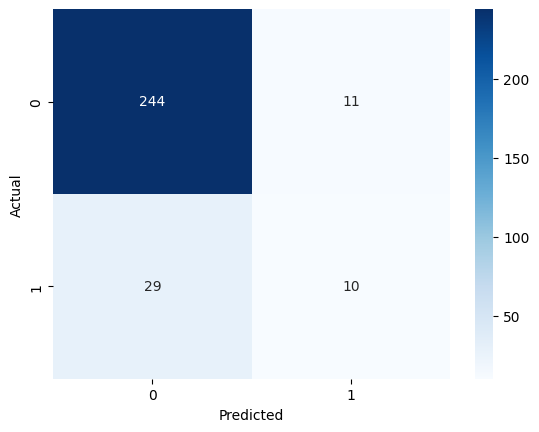

In [ ]:
#from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- Model is quite good at predicting 0(majority class). 
- Overall model accuracy is good but it struggles at prdicting 1(minority clas). Normal for imbalanced data.
- SMOTE oversampling technique can be used to improve model for minority class predictions

In [90]:
# import pickle

with open("final_model.pkl", "wb") as f:
    pickle.dump(final_model, f)
